<a href="https://colab.research.google.com/github/AvijeetPrasad/laputas/blob/main/notebooks/high_energy_protons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#High energy protons

##Summary

Protons have a rest mass equivalent to an energy of around 938 MeV. As the proton is accelerated, due to special relativistic effects, their mass increses. In order to understand the physics at conditions close to the Big Bang, particle accelerators such as the Large Hadron Collider (LHC) accelerates protons and and other charged particles close to the speed of light. For example in LHC, protons are accelerted to energies of 7 TeV, i.e. ~7000 times their rest mass. Due to this increase in their mass/energy their behaviour in a gravitational field will be modified. Here we study these effects as the proton's velocity the speed of light.

This article caters to different sets of audience.


In [ ]:
# Import relevant packages and constants
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.constants.si import c, G, m_p, m_e, e, eps0, h, hbar
from astropy.cosmology import WMAP9 as cosmo
# c   = speed of light
# e   = charge of proton
# eps0= Vacuum electric permittivity
# G   =  universal gravatational constant
# h   = Planck's constant
# hbar= reduced Planck's constant
# m_e =  rest mass of electron
# m_p =  rest mass of proton

##1.Introduction
The gravitational force between two protons of mass $m_p$ separated by a distance $r$ is given by the Newton's law as:

$F_g = \frac{G m_p^2}{r^2} \quad (1)$

For instance, two protons separated by a distance of 1 fm (typical nuclear scale) will experience a attractive force of $1.87 \times 10^{-34}$ N.

In [ ]:
# Let r be the separation of 1 fm 
r = (1*u.fm).to(u.m) 
# The Gravitational force Fg between two protons
Fg = (G * m_p * m_p) / (r * r) 
print(f"Gravitational force between two protons of mass {m_p:.2e} at a distance {r} = {Fg:.2e}") 

Gravitational force between two protons of mass 1.67e-27 kg at a distance 1e-15 m = 1.87e-34 kg m / s2


This is beyond the experimental limit of force that can be detected, which is $10^{-24}$ N  [(Biercuk et al. 2010)](https://arxiv.org/abs/1004.0780v2).

For the gravitational force between two particles at a distance of 1 fm to be equal to this observable limit, their mass has to be $1.22 \times 10^{-22}$ kg. For protons to have such a high mass they have to accelerated to higher speeds.



In [ ]:
# Let F_el be the experimental limit of detectable force
F_el = (1e-24*u.N).decompose()
# The mass at the experimental limit m_el
m_el = ((F_el * r * r)/G)** 0.5
print(f"The mass of particles separated by a distance of {r} at the experimental detection limit = {m_el:.2e}") 

The mass of particles separated by a distance of 1e-15 m at the experimental detection limit = 1.22e-22 kg


Another fundamental parameter associated with the proton is its charge. The electrostatic repulsive (Coulomb) force between two protons of charge $e$ separated by a distance $r$ is given by:

$F_e = k_e \frac{e^2}{r^2} \quad (2)$

where $k_e = 9\times 10^{9}$ N m$^2$/C$^2$ is the permitivity constant. In SI units, $F_e = 2.31 \times 10^{2}$ C$^2$/(F m).


In [ ]:
# Let ke be the Coulomb constant and e the charge
ke = 1/(4*np.pi*eps0) 
# The Coulomb force Fe between two protons:
Fe = (ke * e.si * e.si) / (r * r) 
print(f"Coulomb repulsive force between two protons of chrage {e.si:.2e} at a distance {r} = {Fe:.2e}") 

Coulomb force between two protons of chrage 1.60e-19 C at a distance 1e-15 m = 2.31e+02 C2 / (F m)


The electrostatic force between two protons is 36 orders greaters than the gravitational force.

For the Gravitation force to be equal to Coulomb force between two protons, i.e. $\frac{G m_p^{'2}}{r^2}=\frac{k_e e^2}{r^2}$, the mass of the proton should be

$ m'_p=\sqrt{\frac{k_e e^2}{G}} = 1.86 \times 10^{-9}\quad(3)$ 

In [ ]:
# Let mpp be the mass where Gravitational and elctrostatic force becomes equal
mpp = np.sqrt((ke * e.si * e.si) / G )
mpp = mpp.decompose()
print(f"Mass of proton when gravity balances electrostatic repulsion  = {mpp:.2e}") 

Mass of proton when gravity balances electrostatic repulsion  = 1.86e-09 kg


Due to special relativistic effcts, as a particle of rest mass ($m_0$) travels with a velocity ($v$) close to the speed of light ($c$), its mass increases by a factor $\gamma$ given by:

$\gamma=\frac{1}{\sqrt(1-v^2/c^2)} \quad(4)$

The increased mass ($m$) is given by

$m= \gamma m_0 \quad (5)$ 

##2. Relativistic effects

###Q1. How does the mass of the proton increase as its velocity tends to $c$? 

For protons of rest mass $m_p$, the mass is given as $m'_p=\gamma m_p$. From equations (4) & (5), we obtain the following expression for the velocity of high energy protons

$v = c\sqrt{1-(m_p/m_p')^2} \quad(6)$ 

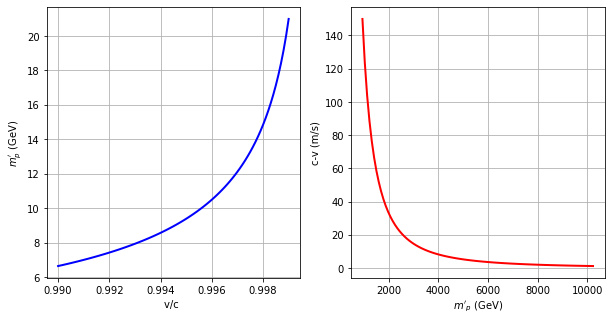

In [ ]:
# Calculating the mass (in GeV) as a function of velocity (in units of c)
# Set the range and stepsize of velocity in units of c
v = np.arange(start=0.99, stop=0.999, step=.0001)*c
# Calculate the gamma factor and mass
gamma = 1/(np.sqrt(1-(v*v)/(c*c)))
mpp = m_p * gamma

# Set the range and stepsize of mass in units of m_p
mpv = np.arange(start=1000, stop=11000, step=100)*m_p
# Calculate the velocity
vv = c * np.sqrt(1 - (m_p/mpv)**2)

# Make the plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
#fig.suptitle('Variation with c')
# Variation of proton mass with velocity
ax1.plot(v/c, (mpp * c *c).to(u.GeV),lw=2,c='b')
ax1.set_xlabel('v/c ')
ax1.set_ylabel("$m_p'$ (GeV)")
ax1.grid(True)
# Difference in proton speed and light speed as a fucntion of proton mass
ax2.plot( (mpv * c *c).to(u.GeV),(c-vv),lw=2,c='red')
ax2.set_xlabel("$m'_p$ (GeV)")
ax2.set_ylabel("c-v (m/s)")
ax2.grid(True)
plt.show()

####Q1.1 What will be the separation between these high energy proton and photon after one year?

In [ ]:
# Table of c - v as a function of mass
diff = c - v
# Calculate the separation over a year
dist = diff*u.year
disty = dist.decompose() 
print("   mp \t\t   c-v  \t separation")
for i in range(0,len(diff),10):
  mpvg = (mpv * c *c).to(u.GeV)[i]
  print(f"{mpvg:6.2f} {diff[i]:10.2}  {disty[i]:10.2}")

   mp 		   c-v  	 separation
938.27 GeV      3e+06 m / s     9.5e+13 m
1876.54 GeV    2.7e+06 m / s     8.5e+13 m
2814.82 GeV    2.4e+06 m / s     7.6e+13 m
3753.09 GeV    2.1e+06 m / s     6.6e+13 m
4691.36 GeV    1.8e+06 m / s     5.7e+13 m
5629.63 GeV    1.5e+06 m / s     4.7e+13 m
6567.90 GeV    1.2e+06 m / s     3.8e+13 m
7506.18 GeV      9e+05 m / s     2.8e+13 m
8444.45 GeV      6e+05 m / s     1.9e+13 m
9382.72 GeV      3e+05 m / s     9.5e+12 m


####Q1.2 Calculate the separation after Hubble time?

In [ ]:
t_h = 1/cosmo.H(0).decompose() 
print("Hubble constant = {0:.2e}".format(cosmo.H(0)))
print("Hubble time = {0:.2e}".format(t_h))

Hubble constant = 6.93e+01 km / (Mpc s)
Hubble time = 4.45e+17 s


In [ ]:
sep = diff*t_h
sepy = dist.decompose() 
for i in range(0,len(diff),10):
  print("c-v = {1:.4f} \t sep = {0:.4e}".format(sepy[i],diff[i]))


c-v = 149.8963 m / s 	 sep = 4.7304e+09 m
c-v = 37.4741 m / s 	 sep = 1.1826e+09 m
c-v = 16.6551 m / s 	 sep = 5.2560e+08 m
c-v = 9.3685 m / s 	 sep = 2.9565e+08 m
c-v = 5.9958 m / s 	 sep = 1.8921e+08 m
c-v = 4.1638 m / s 	 sep = 1.3140e+08 m
c-v = 3.0591 m / s 	 sep = 9.6538e+07 m
c-v = 2.3421 m / s 	 sep = 7.3912e+07 m
c-v = 1.8506 m / s 	 sep = 5.8400e+07 m
c-v = 1.4990 m / s 	 sep = 4.7304e+07 m


What will be gamma factor and mass of the proton when the separation after Hubble time is Compton length 
(c-v)/H0 = $\lambda_c$?

Compton Length:
$\lambda_c = h/m_pc$

The expression for $\gamma$ then becomes:

$\gamma = [1-(1-\lambda_c H_0/c)^2)^{-1/2}$]



In [ ]:
cl = h/(m_p * c) #Compton Length 
print("Compton Length = {0:.4e}".format(cl))

Compton Length = 1.3214e-15 J s2 / (kg m)


In [ ]:
#gamma at Compton Length
H0 = cosmo.H(0).decompose()
gcl = (2*cl * H0 /c ) ** (-0.5) # Check if the Binomial expansion can be avoided
print("Gamma factor at Compton Length = {0:.4e}".format(gcl))
print("Proton mass at Compton Length = {0:.4e}".format(gcl * m_p))
print("Plank mass = {0:.4e}".format((hbar * c / G) ** 0.5))

Gamma factor at Compton Length = 2.2471e+20
Proton mass at Compton Length = 3.7586e-07 kg
Plank mass = 2.1764e-08 J(1/2) kg(1/2) s / m


To accelerate these protons to such high energies, we need linear accelerator. Circular accelerator - energy loss due to synchrotron radiation. 

Most intense laser ~ 10^26 W/m2

Corresponding electric field,

$I = (c\epsilon_0E^2)/2$

E ~ 2.7 X 10^14 V/m

To produce voltages of 10^28 V, the arm length of the accelerator, 

x = V/E ~ 4 X 10^13 m

Highest possible electric field, around the electron, 
$E_{max} = ke/(1 f)^2$ ~ 10^21 V/m

Corresponding arm length ~ 7 X 10^6 m

In [ ]:
##!!!! Fix the units
I = 1.e26 #W/m^2
E = ((2 * I ) / (c * eps0)) ** .5
print("Electric field = {0:.4e}".format(E))
V = 1.e28 #V
x = V/E 
print("Arm length of the accelerator = {0:.4e}".format(x))
Emax = (1/(4 * math.pi * eps0)) * (e / cl ** 2)
print("Highest possible electric field = {0:.4e}".format(Emax))
print("Corresponding arm length = {0:.4e}".format(V/Emax))

Electric field = 2.7449e+14 s(1/2) / F(1/2)
Arm length of the accelerator = 3.6431e+13 F(1/2) / s(1/2)
Highest possible electric field = 8.2466e+20 C kg2 m3 / (F J2 s4)
Corresponding arm length = 1.2126e+07 F J2 s4 / (C kg2 m3)


In [ ]:
# Width of the beam (wavelength of the laser) w = 10^-7 m
# Volume of the beam w^2 * l = 10^-7 m
w = 1.e-7
vol =  w * w * V/Emax
print("Volume of the beam = {0:.4e}".format(vol))
print("Energy density of the beam = {0:.4e}".format(e * V /vol))

Volume of the beam = 1.2126e-07 F J2 s4 / (C kg2 m3)
Energy density of the beam = 1.3213e+16 C2 kg2 m3 / (F J2 s4)


Radius of the path taken by the particle in galactic magnetic field ~10^-6 G

$r = \gamma m v/e B$

In [ ]:
v2 = c*np.sqrt(1 - (1/7000.)**2)
r = (7000 * m_p) * v2 / (e * 10**(-10.)) # in meters
print("Radius of the path taken by the particle in galactic magnetic field  = {0:.4e}".format(r))

Radius of the path taken by the particle in galactic magnetic field  = 2.1908e+14 kg m / (C s)


Radius of the Milky Galaxy is about $10^{20}$ m. So the radius is still a million times small.

In [ ]:
g3 = 10**18. 
v3 = c*np.sqrt(1 - (1/g3)**2)
r3 = (g3 * m_p) * v3 / (e * 10**(-10.)) # in meters
print("Radius of the path taken by the Planck energy particle in galactic magnetic field  = {0:.4e}".format(r3))

Radius of the path taken by the Planck energy particle in galactic magnetic field  = 3.1297e+28 kg m / (C s)


#### Did the universe ever go through a Planck phase?

When gravity is as strong as the strong interaction (for which the coupling g2/hbarc ~1) we get

$G m^2 = \hbar c$

$m = \sqrt{\hbar c / G}=m_{pl}$

Self energy associated with the charge $e^2 / 4\pi \epsilon_0 r$. This tends to infinity as $r \rightarrow 0 $. 

Self energy associated with gravity $G m^2 / r$. This tends to infinity as $r \rightarrow 0 $. 

Bare mass $m_0$ (without including any interaction)

Total mass 
$m_{tot} = m_0 + e^2 / (4 \pi \epsilon_0  r c^2) - G m_{tot}^2 / (r c^2)$

Solving for $m_{tot}$ as $r \rightarrow 0 $

$m_{tot} = e/\sqrt{4 \pi \epsilon_0 G}$

This holds true even in GR (ADM mass). 

Including rotation
$m_{tot} = m_0 + e^2 / (4\pi \epsilon_0 r c^2) - G m_{tot}^2 / (r c^2) + \hbar/(rc)$

Solving for $m_{tot}$ as $r \rightarrow 0 $
$m_{tot} = \sqrt{\hbar c/G + e^2/4 \pi \epsilon_0 G}$

The bare mass does not appear in this expression as $r \rightarrow 0$.

As $r \rightarrow 0 $, the mass does not tend to infinity in this semi classical model. 

With strong force, a similar analysis gives 
$m = g_s/\sqrt{G}$.

$g_s/\hbar c \approx 1$

In [ ]:
# mtot1 = total mass without rotation
mtot1 = e / np.sqrt(4*np.pi*eps0*G)
print("Total mass without rotation = {0:.4e} kG".format(mtot1.value))

Total mass without rotation = 1.8592e-09 kG


In [ ]:
mtot2 = np.sqrt((hbar * c / G).value + (e**2/(4*np.pi*eps0*G)).value)
print("Total mass with rotation = {0:.4e} kG".format(mtot2))

Total mass with rotation = 2.1844e-08 kG


In [ ]:
np.sqrt(e**2/(4*np.pi*eps0*G)).decompose()

<Quantity 1.85920909e-09 kg>

In [ ]:
np.sqrt((hbar * c / G)).decompose()

<Quantity 2.17643434e-08 kg>

# Mach's Principle

If the local mass $(m_{loc})$ is due to all the other masses ($M$) in the universe, and $r$ is the average radius of distant mass, then we have the equation:

$m_{loc} = \frac{G M m_{loc}}{r c^2}$

This implies

$\frac{G M}{r c^2}\approx 1$

So the value of $G$ is small because $M$ is large.

Using $r = R_H$, as the Hubble radius.

So, the equation now becomes

$8\pi G \rho_{av} T_H^2 \approx 1.$

In [ ]:
rho_av = 9.e-27
8*math.pi*G*t_h**2*rho_av

<Quantity 2.99138337 m3 / kg>

The gravitational charge $G \times mass^2$. The three possibilites are:

$G m_p^2$, $G m_e^2$ and $G m_p m_e$. 

The fluctuations in these masses is 

$\sqrt{N} G m_p^2/\hbar c$; this corresponds to the Pion constant.

$\sqrt{N} G m_e^2/\hbar c$; this corresponds to the Weak interaction constant.

$\sqrt{N} G m_p m_e/\hbar c$; this corresponds to the Fine-structure constant.

In [ ]:
N = 4.e78 # The total number of particles in the Universe

In [ ]:
(np.sqrt(N) * G * m_p**2) / (hbar * c) # Pion constant is around 14.

<Quantity 11.81229883 kg m2 / (J s2)>

In [ ]:
(np.sqrt(N) * G * m_e**2) / (hbar * c) # Weak interaction constant is between 10^-6 and 10^-7


<Quantity 3.50361879e-06 kg m2 / (J s2)>

In [ ]:
 (np.sqrt(N) * G * m_e*m_p) / (hbar * c)  # Fine structure constant = 1 / 137 

<Quantity 0.00643318 kg m2 / (J s2)>

In [ ]:
  (hbar * c) / (np.sqrt(N) * G * m_e*m_p)

<Quantity 155.44414345 J s2 / (kg m2)>